# "Optimal" Model
This model does not show under- or overfitting and performs well on both, training and testing data. Afterwards, a brief description on how to tackle the challenges of an optimal model complexity. 

To address underfitting, one approach is to increase the complexity of the model by adding more layers or increasing the number of filters in each layer. To address overfitting, we can try several approaches. One approach is to simplify the model by removing some layers or decreasing the number of filters in each layer. Another approach is to use less epochs for example.




Adding dropout or weight decay can help to address both of the above mentioned issues. We can also try adjusting the hyperparameters such as learning rate, batch size, or number of epochs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


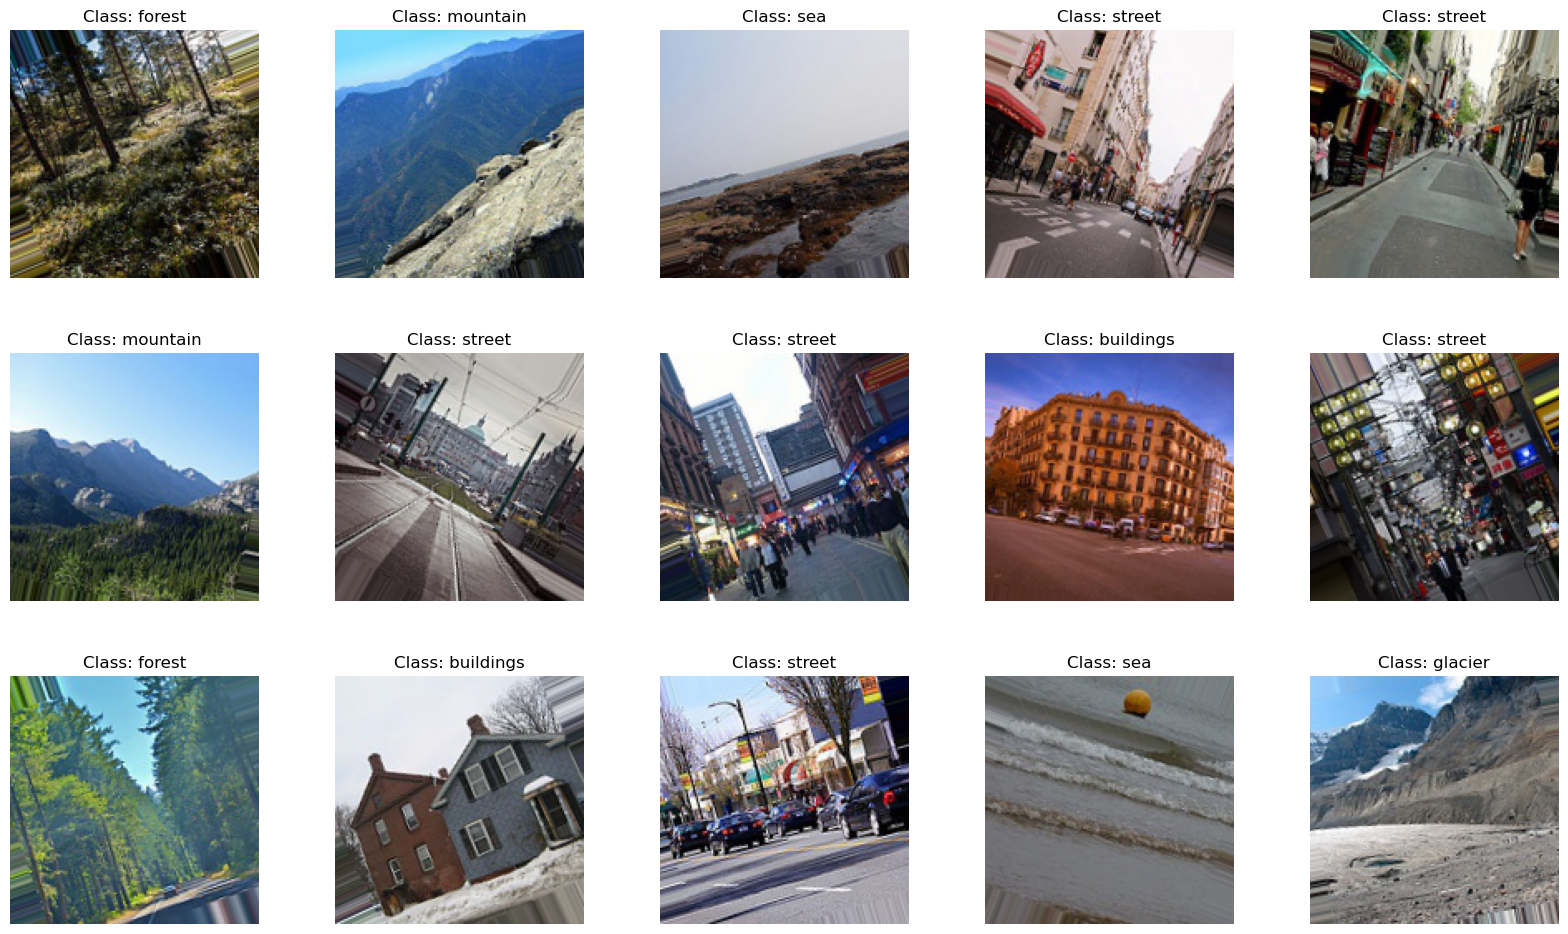

In [2]:
%run rueegg_wissiak_data_augmentation.ipynb

## Building the Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2023-03-01 15:23:19.083329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

## Training the Model

In [12]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10) 

439/439 [==============================] - 162s 369ms/step - loss: 0.6755 - accuracy: 0.7569 - val_loss: 0.5890 - val_accuracy: 0.7933


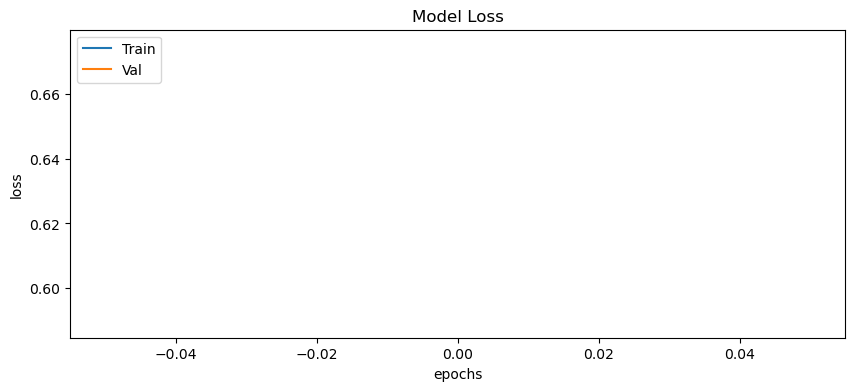

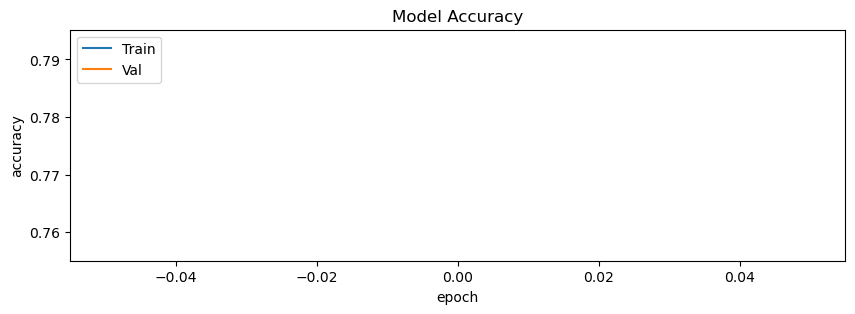

In [13]:
%run rueegg_wissiak_model_visualization.ipynb

In [14]:
%run rueegg_wissiak_model_evaluation.ipynb

94/94 [==============================] - 10s 103ms/step
Predicted classes: [0 0 0 ... 4 0 5]
True labels: [0 0 0 ... 5 5 5]
Accuracy:
 0.7933333333333333
